# Story 6: What Is The State of Food Security and Nutrition in the US

## Prompt:
The United Nations Food and Agriculture Organization publication, The State of Food Security and Nutrition in the World 2022 (https://www.fao.org/documents/card/en/c/cc0639en) might lead one to the conclusion that it's an elsewhere problem. That the people who are suffering malnutrition and starvation are "elsewhere", not in our backyard. For this assignment you will need to take a closer look here at home (the US)

## Notes:

- You will need to locate and source data that reflects food security and nutrition by state broken down by men, women, children and by age groups

- Your analysis should demonstrate correlations that exist between level of poverty and food insecurity, malnutrition and starvation.

- Your data and analysis should also indicate what happens to the children as they mature into adults. Will they become fully functional citizens or will they require continued support?

- You data visualizations need to tell the story for a political audience that you were lobbying to address the issue of food insecurity in the US



# Installing Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

I first started by importing packages which I would need to perform statistical analysis and make visualizations.



# Loading Dataset

In [2]:
df_state = pd.read_excel('MMG2023_2019-2021_Data_ToShare.xlsx', sheet_name='State')
df_state.head()

,FIPS,State Name,State,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,# of Food Insecure Older Adults\n(State of Senior Hunger),Older Adult Very Low Food Security Rate\n(State of Senior Hunger),# of Very Low Food Secure Older Adults\n(State of Senior Hunger),Child Food Insecurity Rate,# of Food Insecure Children,% food insecure Children in HH w/HH Incomes Below 185 FPL,% food insecure Children in HH w/HH Incomes Above 185 FPL,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1,Alabama,AL,2021,0.148,746550,0.26,0.12,0.10,1.30,...,100289,0.056,38714,0.183,204830,0.77,0.23,3.50,20.363445,461137000
1,2,Alaska,AK,2021,0.107,78260,0.19,0.12,0.08,1.30,...,6184,0.028,2156,0.128,22960,0.73,0.27,4.25,24.768164,58797000
2,4,Arizona,AZ,2021,0.103,751690,0.20,0.14,0.08,1.85,...,79721,0.049,46563,0.140,226080,0.68,0.32,3.30,19.214580,438117000
3,5,Arkansas,AR,2021,0.155,467550,0.25,0.16,0.13,1.30,...,75302,0.096,36311,0.191,134690,0.73,0.27,3.18,18.498904,262358000
4,6,California,CA,2021,0.105,4104060,0.18,0.13,0.06,2.00,...,485709,0.039,184771,0.135,1182720,0.66,0.34,3.67,21.357532,2658795000


In [3]:
print(df_state.columns)

Index(['FIPS', 'State Name', 'State', 'Year', 'Overall Food Insecurity Rate ',
       '# of Food Insecure Persons Overall ',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       '% FI > Low Threshold',
       'Senior Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Seniors\n(State of Senior Hunger)',
       'Senior Very Low Food Security Rate\n(State of Senior Hunger)',
       '# of Very Low Food Secure Seniors\n(State of Senior Hunger)',
       'Older Adult Food Insecurity Rate\n(State of Senior Hunger)',
       '# of Food Insecure Older Adults\n(State of Senior Hunger)',
       'Older Adult Very Low Food Security Rate

For the purposes of this assignment, I used data provided by Feeding America (data can be requested here: https://map.feedingamerica.org/). There are several sheets in this dataset, as the data is sorted by notes, county, age (50+), and state. I decided to load the 'state' sheet from the dataset here since this one encompassed the information I needed. This spreadsheet contains information by state on food insecurity in 2021, based on age, race, income, and meal costs.

# Data Wrangling


### Dataframe

In [4]:
new_df_state = df_state[df_state['Year'] == 2021]
new_df_state = new_df_state.loc[:, ['State','Overall Food Insecurity Rate ','# of Food Insecure Persons Overall ','Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ','Child Food Insecurity Rate ', '# of Food Insecure Children ','% food insecure Children in HH w/HH Incomes Below 185 FPL',
       '% food insecure Children in HH w/HH Incomes Above 185 FPL']]
new_df_state.head()

,State,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Child Food Insecurity Rate,# of Food Insecure Children,% food insecure Children in HH w/HH Incomes Below 185 FPL,% food insecure Children in HH w/HH Incomes Above 185 FPL
0,AL,0.148,746550,0.26,0.12,0.10,0.183,204830,0.77,0.23
1,AK,0.107,78260,0.19,0.12,0.08,0.128,22960,0.73,0.27
2,AZ,0.103,751690,0.20,0.14,0.08,0.140,226080,0.68,0.32
3,AR,0.155,467550,0.25,0.16,0.13,0.191,134690,0.73,0.27
4,CA,0.105,4104060,0.18,0.13,0.06,0.135,1182720,0.66,0.34


I selected the columns I wanted to work with for this assignment and made a new dataframe which can be seen here.

### Missing Values

In [5]:
missing_values = new_df_state.isna().sum()
print(missing_values)

State                                                          0
Overall Food Insecurity Rate                                   0
# of Food Insecure Persons Overall                             0
Food Insecurity Rate among Black Persons (all ethnicities)    11
Food Insecurity Rate among Hispanic Persons (any race)         4
Food Insecurity Rate among White, non-Hispanic Persons         1
Child Food Insecurity Rate                                     0
# of Food Insecure Children                                    0
% food insecure Children in HH w/HH Incomes Below 185 FPL      0
% food insecure Children in HH w/HH Incomes Above 185 FPL      0
dtype: int64


This dataset contains multiple values for some of the states, which causes missing values in some of the rows. This is because of an upper and lower threshold recorded in the dataset which I will not be using for this assignment. Because of that, I have decided to use the median values for these states in my graphs.

# Summary Statistics


In [6]:
highest_insecurity = new_df_state.loc[new_df_state['Overall Food Insecurity Rate '].idxmax()]
state_highest_insecurity = highest_insecurity['State']
rate_highest_insecurity = highest_insecurity['Overall Food Insecurity Rate ']

lowest_insecurity = new_df_state.loc[new_df_state['Overall Food Insecurity Rate '].idxmin()]
state_lowest_insecurity = lowest_insecurity['State']
rate_lowest_insecurity = lowest_insecurity['Overall Food Insecurity Rate ']

print(f"State with highest Overall Food Insecurity Rate: {state_highest_insecurity} ({rate_highest_insecurity})")
print(f"State with lowest Overall Food Insecurity Rate: {state_lowest_insecurity} ({rate_lowest_insecurity})")

highest_child_insecurity = new_df_state.loc[new_df_state['Child Food Insecurity Rate '].idxmax()]
state_highest_child_insecurity = highest_insecurity['State']
rate_highest_child_insecurity = highest_insecurity['Child Food Insecurity Rate ']

lowest_child_insecurity = new_df_state.loc[new_df_state['Child Food Insecurity Rate '].idxmin()]
state_lowest_child_insecurity = lowest_insecurity['State']
rate_lowest_child_insecurity = lowest_insecurity['Child Food Insecurity Rate ']

print(f"State with highest Overall Child Food Insecurity Rate: {state_highest_child_insecurity} ({rate_highest_child_insecurity})")
print(f"State with lowest Overall Child Food Insecurity Rate: {state_lowest_child_insecurity} ({rate_lowest_child_insecurity})")


State with highest Overall Food Insecurity Rate: MS (0.163)
State with lowest Overall Food Insecurity Rate: ND (0.055)
State with highest Overall Child Food Insecurity Rate: MS (0.188)
State with lowest Overall Child Food Insecurity Rate: ND (0.075)


We can see that the states with the highest and lowest food insecurity rate among their population, also share the highest and lowest food insecurity rates in children. With this, I would like to highlight that even though the state with the lowest food insecurity in 2021 was North Dakota, with a rate of .055 or 5.5% of its population, this number is not at 0, meaning that the lowest food insecurity in the nation is not at 0. If the state with the lowest food insecurity rate is at 5.5%, we can only imagine how the other states must be. Next, I will attempt to visualize all the states for this data.

# Data Visualizations


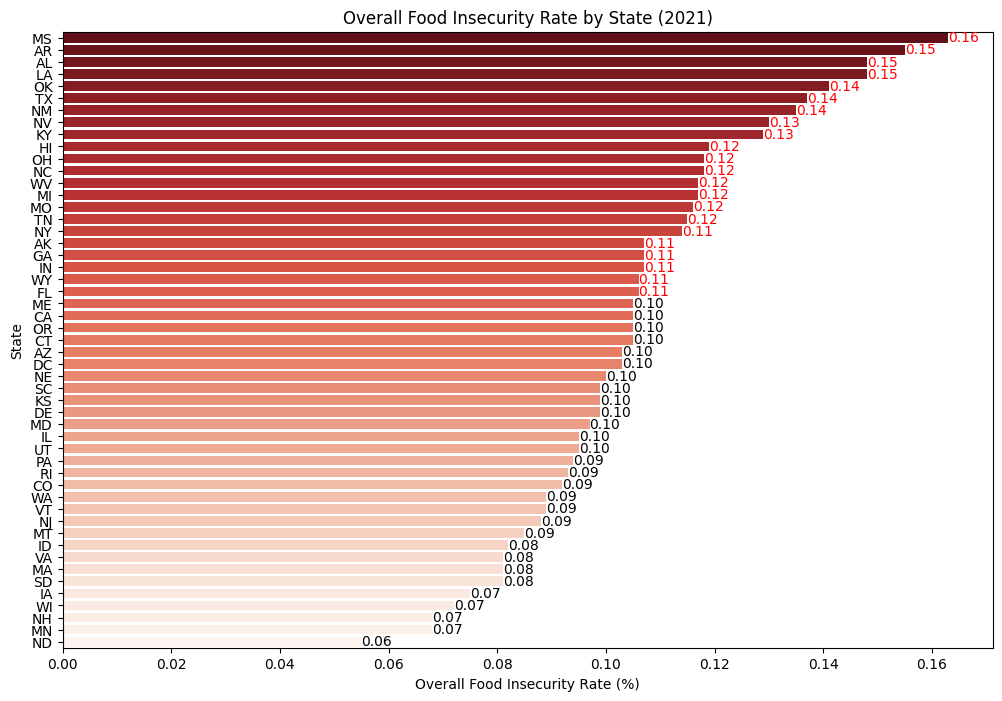

In [7]:
pivot_df = new_df_state.pivot_table(index='State', values='Overall Food Insecurity Rate ', aggfunc='mean')
pivot_df_sorted = pivot_df.sort_values(by='Overall Food Insecurity Rate ', ascending=False)
average_rate = pivot_df_sorted['Overall Food Insecurity Rate '].mean()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Overall Food Insecurity Rate ', y=pivot_df_sorted.index, data=pivot_df_sorted, palette='Reds_r')

for index, value in enumerate(pivot_df_sorted['Overall Food Insecurity Rate ']):
    color = 'red' if value > average_rate else 'black'
    plt.text(value, index, f'{value:.2f}', va='center', color=color)

plt.title('Overall Food Insecurity Rate by State (2021)')
plt.xlabel('Overall Food Insecurity Rate (%)')
plt.ylabel('State')
plt.show()

This graph depicts the overall food insecurity rate by state in percentage form. Using the reds color scheme, I was able to display increasing food insecurity with increasing redness intensity. I also displayed the percentages above national average in red.

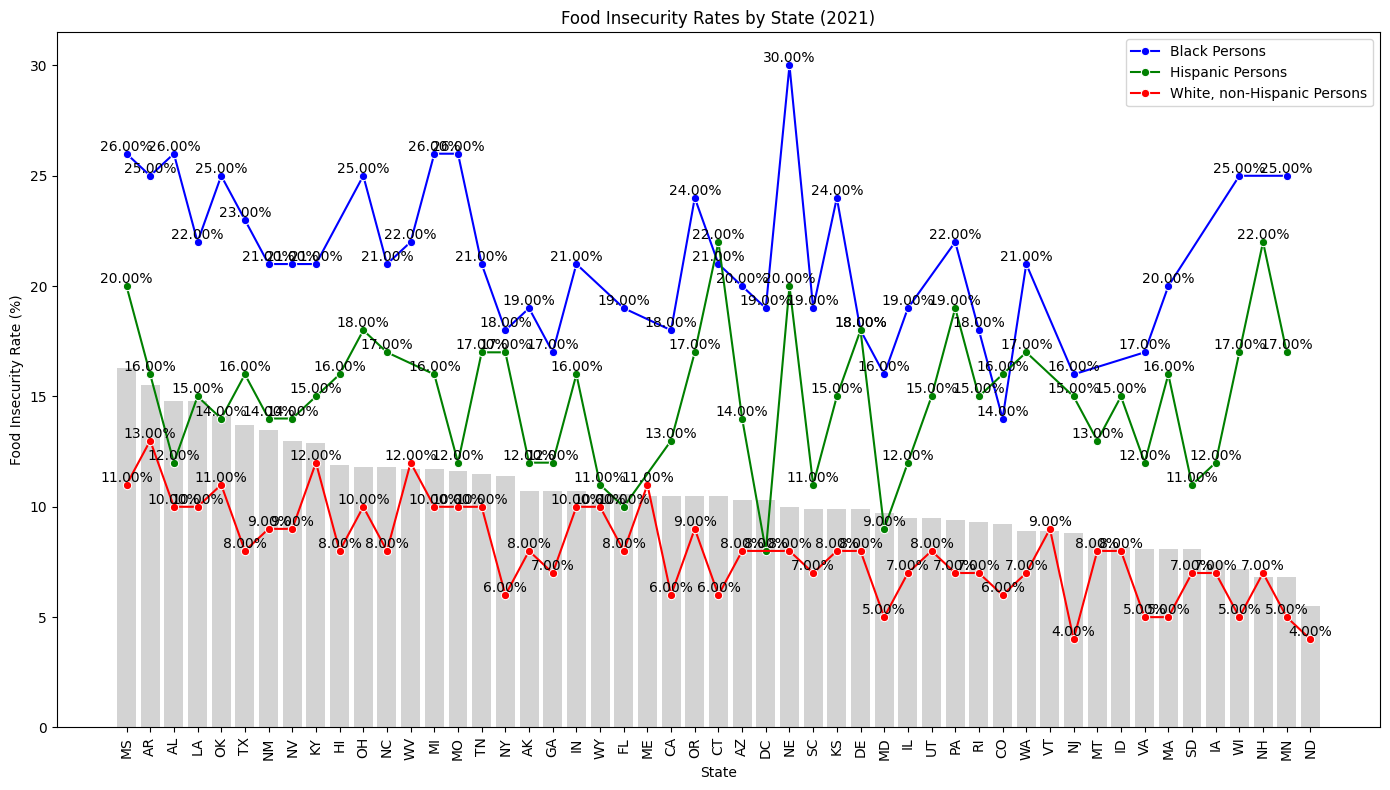

In [8]:
median_black_rate = new_df_state.groupby('State')['Food Insecurity Rate among Black Persons (all ethnicities)'].median() * 100
median_hispanic_rate = new_df_state.groupby('State')['Food Insecurity Rate among Hispanic Persons (any race)'].median() * 100
median_white_rate = new_df_state.groupby('State')['Food Insecurity Rate among White, non-Hispanic Persons '].median() * 100

overall_median_rate = new_df_state.groupby('State')['Overall Food Insecurity Rate '].median() * 100

df_median = pd.DataFrame({
    'State': median_black_rate.index,
    'Overall Food Insecurity Rate': overall_median_rate.values,
    'Food Insecurity Rate among Black Persons (all ethnicities)': median_black_rate.values,
    'Food Insecurity Rate among Hispanic Persons (any race)': median_hispanic_rate.values,
    'Food Insecurity Rate among White, non-Hispanic Persons ': median_white_rate.values
})

df_median_sorted = df_median.sort_values(by='Overall Food Insecurity Rate', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Overall Food Insecurity Rate', data=df_median_sorted, color='lightgray')
sns.lineplot(data=df_median_sorted, x='State', y='Food Insecurity Rate among Black Persons (all ethnicities)', marker='o', color='blue', label='Black Persons')
sns.lineplot(data=df_median_sorted, x='State', y='Food Insecurity Rate among Hispanic Persons (any race)', marker='o', color='green', label='Hispanic Persons')
sns.lineplot(data=df_median_sorted, x='State', y='Food Insecurity Rate among White, non-Hispanic Persons ', marker='o', color='red', label='White, non-Hispanic Persons')

plt.title('Food Insecurity Rates by State (2021)')
plt.xlabel('State')
plt.ylabel('Food Insecurity Rate (%)')
plt.xticks(rotation=90)
plt.legend()

for index, row in df_median_sorted.iterrows():
    plt.text(row['State'], row['Food Insecurity Rate among Black Persons (all ethnicities)'], f'{row["Food Insecurity Rate among Black Persons (all ethnicities)"]:.2f}%', ha='center', va='bottom')
    plt.text(row['State'], row['Food Insecurity Rate among Hispanic Persons (any race)'], f'{row["Food Insecurity Rate among Hispanic Persons (any race)"]:.2f}%', ha='center', va='bottom')
    plt.text(row['State'], row['Food Insecurity Rate among White, non-Hispanic Persons '], f'{row["Food Insecurity Rate among White, non-Hispanic Persons "]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Here, I stacked the demographic data provided in the dataset in the form of a scatterplot over the bar graph of overall food insecurity rate. Since this value was recorded in thresholds, I used the median value for each state for the scatterplot. We see that there is a general racial disparity nationwide when it comes to food security. We can continue to look at this to provide a more thorough analysis.

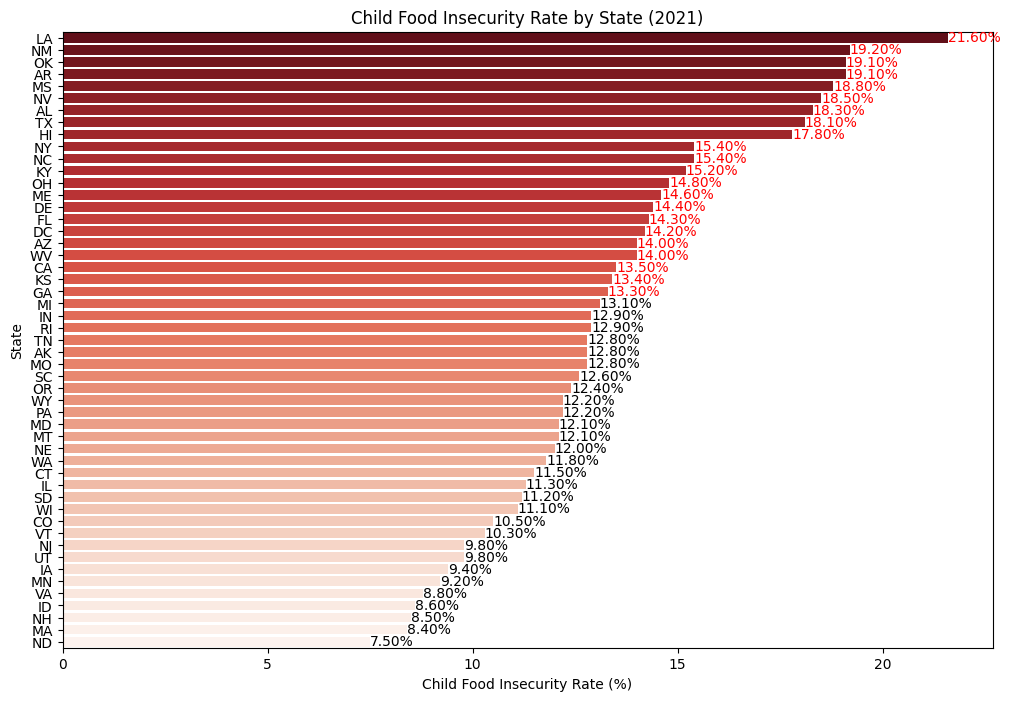

In [9]:
median_child_rate = new_df_state.groupby('State')['Child Food Insecurity Rate '].median() * 100
median_child_rate_sorted = median_child_rate.sort_values(ascending=False)
average_rate = median_child_rate.mean()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=median_child_rate_sorted.values, y=median_child_rate_sorted.index, palette='Reds_r')

for index, value in enumerate(median_child_rate_sorted.values):
    color = 'red' if value > average_rate else 'black'
    plt.text(value, index, f'{value:.2f}%', va='center', color=color)

plt.title('Child Food Insecurity Rate by State (2021)')
plt.xlabel('Child Food Insecurity Rate (%)')
plt.ylabel('State')
plt.show()


Here, I repeated the overall food insecurity rate for children. I, once again, had to use the median here as well. I marked the values that were higher than the national average in red, however we do see in general that these numbers are higher than the overall values we looked at before.

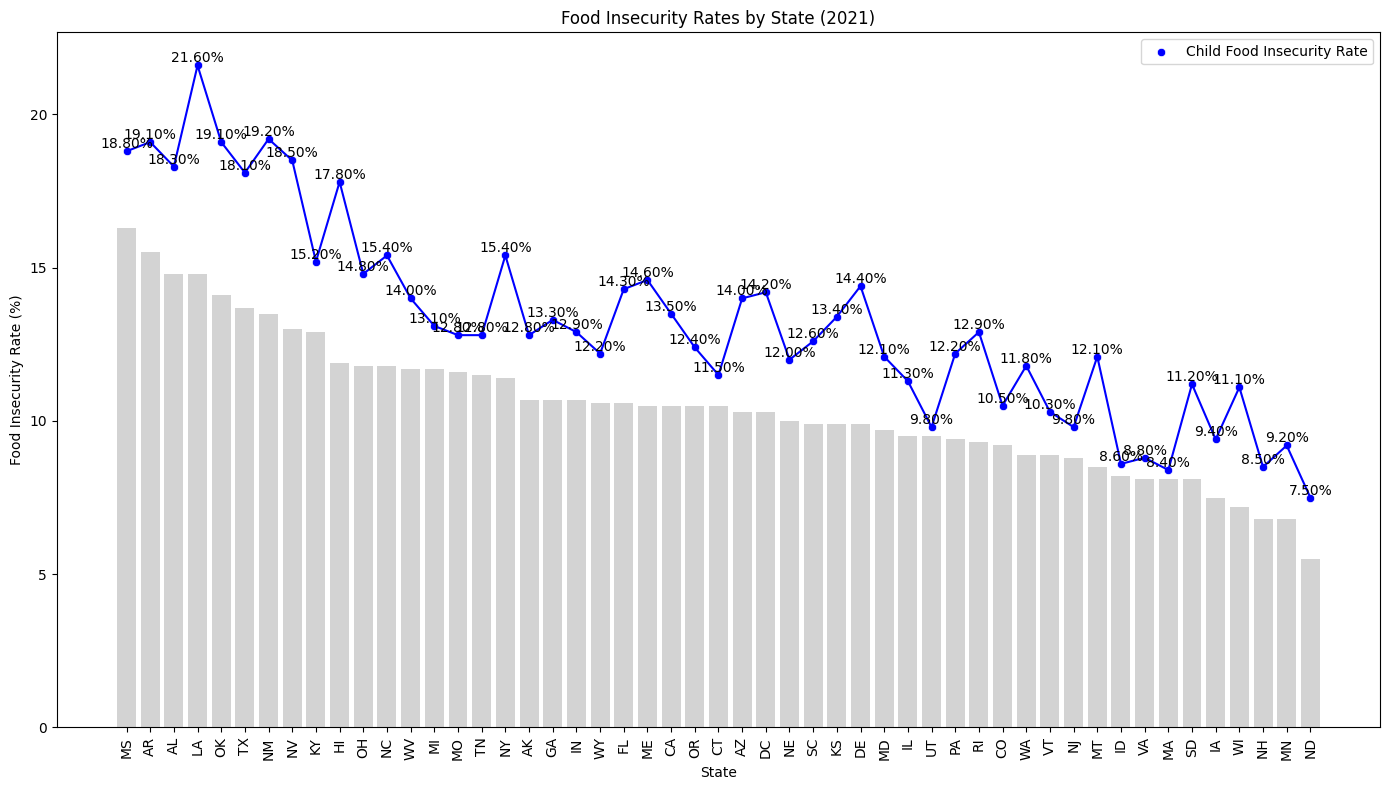

In [10]:
median_child_rate = new_df_state.groupby('State')['Child Food Insecurity Rate '].median() * 100

df_child_median = pd.DataFrame({
    'State': median_child_rate.index,
    'Child Food Insecurity Rate': median_child_rate.values
})

df_median_sorted = df_median.sort_values(by='Overall Food Insecurity Rate', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Overall Food Insecurity Rate', data=df_median_sorted, color='lightgray')
sns.scatterplot(data=df_child_median, x='State', y='Child Food Insecurity Rate', color='blue', marker='o', label='Child Food Insecurity Rate')
sns.lineplot(data=df_child_median, x='State', y='Child Food Insecurity Rate', color='blue')

plt.title('Food Insecurity Rates by State (2021)')
plt.xlabel('State')
plt.ylabel('Food Insecurity Rate (%)')
plt.xticks(rotation=90)
plt.legend()

for index, row in df_child_median.iterrows():
    plt.text(row['State'], row['Child Food Insecurity Rate'], f'{row["Child Food Insecurity Rate"]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

I made another overall food insecurity bar graph and this time stacked the child food insecurity rate over it.

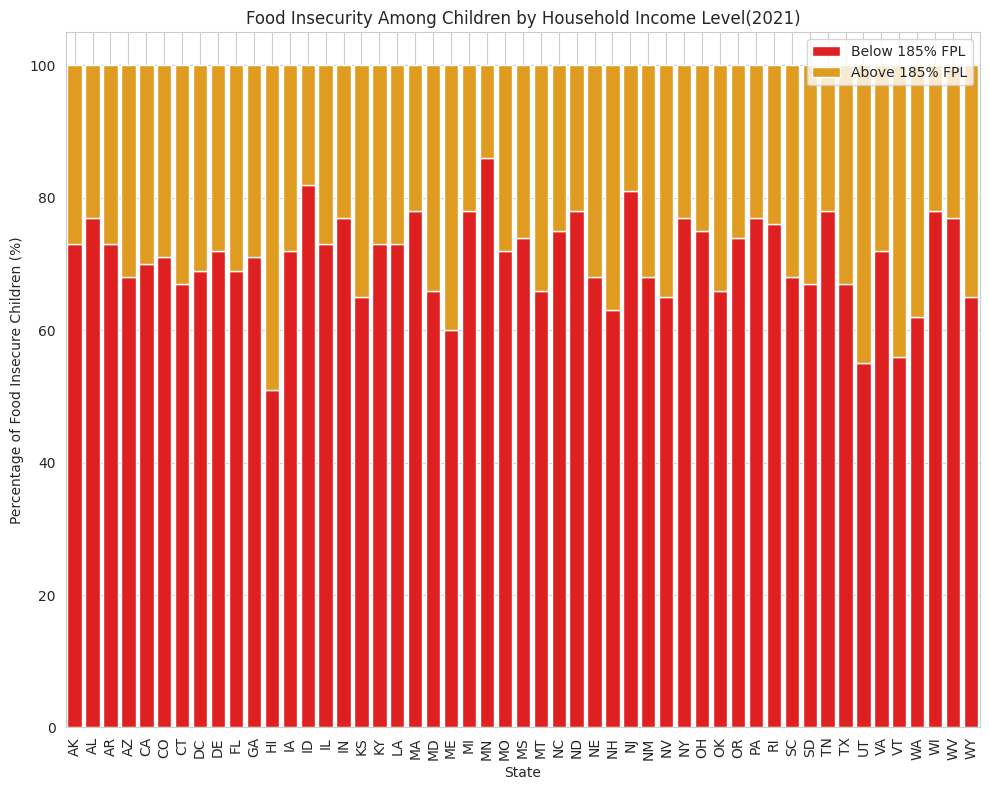

In [11]:
child_insecurity_df = df_state[['State',
                                 '% food insecure Children in HH w/HH Incomes Below 185 FPL',
                                 '% food insecure Children in HH w/HH Incomes Above 185 FPL']].dropna()

child_insecurity_median = child_insecurity_df.groupby('State').median().reset_index()
child_insecurity_median['% food insecure Children in HH w/HH Incomes Below 185 FPL'] *= 100
child_insecurity_median['% food insecure Children in HH w/HH Incomes Above 185 FPL'] *= 100

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(x='State', y='% food insecure Children in HH w/HH Incomes Below 185 FPL', data=child_insecurity_median, color='red', label='Below 185% FPL')
sns.barplot(x='State', y='% food insecure Children in HH w/HH Incomes Above 185 FPL', data=child_insecurity_median,
            bottom=child_insecurity_median['% food insecure Children in HH w/HH Incomes Below 185 FPL'], color='orange', label='Above 185% FPL')

plt.title('Food Insecurity Among Children by Household Income Level(2021)')
plt.xlabel('State')
plt.ylabel('Percentage of Food Insecure Children (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


With this figure, it is clear that there is a lower percentage of food insecure children nationwide in families who are 185% above the federal poverty level. Those that are below seem to have at least 50% of children food insecure in each state. This indicates that there is an association between household income and food security.

# Conclusions

This analysis of food insecurity in the United States highlights the potential roots of the problem, with disparities observed across states, income and different demographic groups. High rates of food insecurity in states like Mississippi highlight the urgent need for interventions on a governmental level. The correlation between poverty and food insecurity emphasizes the importance of policies aimed at reducing these inequalities and promoting access to more options for everyone affected. The prevalence of food insecurity among children should be alarming since it could impact their well-being and future prospects. By addressing these systemic challenges, policymakers can work towards creating a more inclusive society where every individual has access to nutritious food and opportunities for a better quality of life. With this analysis, in the future, I would add a figure which depicts these disparities on a map of the United States.